In [1]:
import tensorflow as tf
from tensorflow import keras 
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

dataset1_origin = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset1_origin.npz', allow_pickle=True)
dataset1_horizon = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset1_horizon.npz', allow_pickle=True)
dataset1_vertical = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset1_vertical.npz', allow_pickle=True)
dataset1_vh = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset1_vh.npz', allow_pickle=True)
dataset2_origin = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_origin.npz', allow_pickle=True)
dataset2_horizon = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_horizon.npz', allow_pickle=True)
dataset2_vertical = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_vertical.npz', allow_pickle=True)
dataset2_vh = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_vh.npz', allow_pickle=True)


d1o_origin_images, d1o_target_images, d1o_number_labels, d1o_coordinates = dataset1_origin['images'], dataset1_origin['filters'], dataset1_origin['numbers'],  dataset1_origin['coordinates']
d1h_origin_images, d1h_target_images, d1h_number_labels, d1h_coordinates = dataset1_horizon['images'], dataset1_horizon['filters'], dataset1_horizon['numbers'],  dataset1_horizon['coordinates']
d1v_origin_images, d1v_target_images, d1v_number_labels, d1v_coordinates = dataset1_vertical['images'], dataset1_vertical['filters'], dataset1_vertical['numbers'],  dataset1_vertical['coordinates']
d1vh_origin_images, d1vh_target_images, d1vh_number_labels, d1vh_coordinates = dataset1_vh['images'], dataset1_vh['filters'], dataset1_vh['numbers'],  dataset1_vh['coordinates']
d2o_origin_images, d2o_target_images, d2o_number_labels, d2o_coordinates = dataset2_origin['images'], dataset2_origin['filters'], dataset2_origin['numbers'],  dataset2_origin['coordinates']
d2h_origin_images, d2h_target_images, d2h_number_labels, d2h_coordinates = dataset2_horizon['images'], dataset2_horizon['filters'], dataset2_horizon['numbers'],  dataset2_horizon['coordinates']
d2v_origin_images, d2v_target_images, d2v_number_labels, d2v_coordinates = dataset2_vertical['images'], dataset2_vertical['filters'], dataset2_vertical['numbers'],  dataset2_vertical['coordinates']
d2vh_origin_images, d2vh_target_images, d2vh_number_labels, d2vh_coordinates = dataset2_vh['images'], dataset2_vh['filters'], dataset2_vh['numbers'],  dataset2_vh['coordinates']

origin_images = np.concatenate([d1o_origin_images, d2o_origin_images, d1h_origin_images, d2h_origin_images, d1v_origin_images, d2v_origin_images, d1vh_origin_images, d2vh_origin_images], axis = 0)
target_images = np.concatenate([d1o_target_images, d2o_target_images, d1h_target_images, d2h_target_images, d1v_target_images, d2v_target_images, d1vh_target_images, d2vh_target_images], axis = 0)
numbers_labels = np.concatenate([d1o_number_labels, d2o_number_labels, d1h_number_labels, d2h_number_labels, d1v_number_labels, d2v_number_labels, d1vh_number_labels, d2vh_number_labels], axis = 0)
coordinates = np.concatenate([d1o_coordinates, d2o_coordinates, d1h_coordinates, d2h_coordinates, d1v_coordinates, d2v_coordinates, d1vh_coordinates, d2vh_coordinates], axis = 0)

print(origin_images.shape)
print(target_images.shape)
print(numbers_labels.shape)
print(coordinates.shape)

(13276, 24, 32)
(13276, 24, 32)
(13276,)
(13276, 4, 8)


In [3]:
origin_images = origin_images.reshape(13276, 24, 32, 1)
target_images = target_images.reshape(13276, 24, 32, 1)
print(origin_images.shape)
print(target_images.shape)

(13276, 24, 32, 1)
(13276, 24, 32, 1)


In [4]:
print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

origin_images = origin_images / origin_images.max()
target_images = target_images / target_images.max()

print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

print(origin_images.shape)
print(target_images.shape)

255 0
255 0
1.0 0.0
1.0 0.0
(13276, 24, 32, 1)
(13276, 24, 32, 1)


In [5]:
def normalize_coordinates(coords, width=32, height=24):
    # Check the shape of the input coordinates
    if coords.shape[-1] != 8:
        raise ValueError("The last dimension of the input coordinates should be 8.")

    # Create a normalization array
    normalization_factors = np.array([width, height, width, height, width, height, width, height])

    # Normalize the coordinates
    normalized_coords = coords / normalization_factors

    return normalized_coords


In [6]:
norm_location = normalize_coordinates(coordinates)
print(norm_location.shape)

from keras.utils import to_categorical

number_labels = to_categorical(numbers_labels, num_classes=5)
print(number_labels.shape)

(13276, 4, 8)
(13276, 5)


In [7]:
# print(trian_labels.shape)

(5, 48, 32, 1)


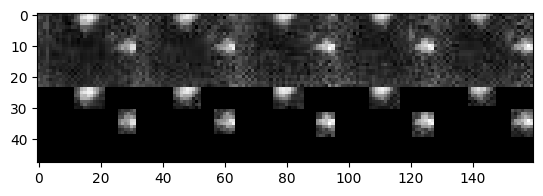

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[[0.375      0.         0.65625    0.         0.65625    0.25
   0.375      0.25      ]
  [0.8125     0.29166667 1.         0.29166667 1.         0.58333333
   0.8125     0.58333333]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.        ]]]


In [8]:
imgs = np.concatenate([origin_images[1000:1005], target_images[1000:1005]], axis = 1)
print(imgs.shape)

plt.imshow(imgs.transpose(1, 0, 2, 3).reshape(48, -1, 1), cmap = 'gray')
plt.show()
print(number_labels[1000:1005])

print(norm_location[1000:1001])

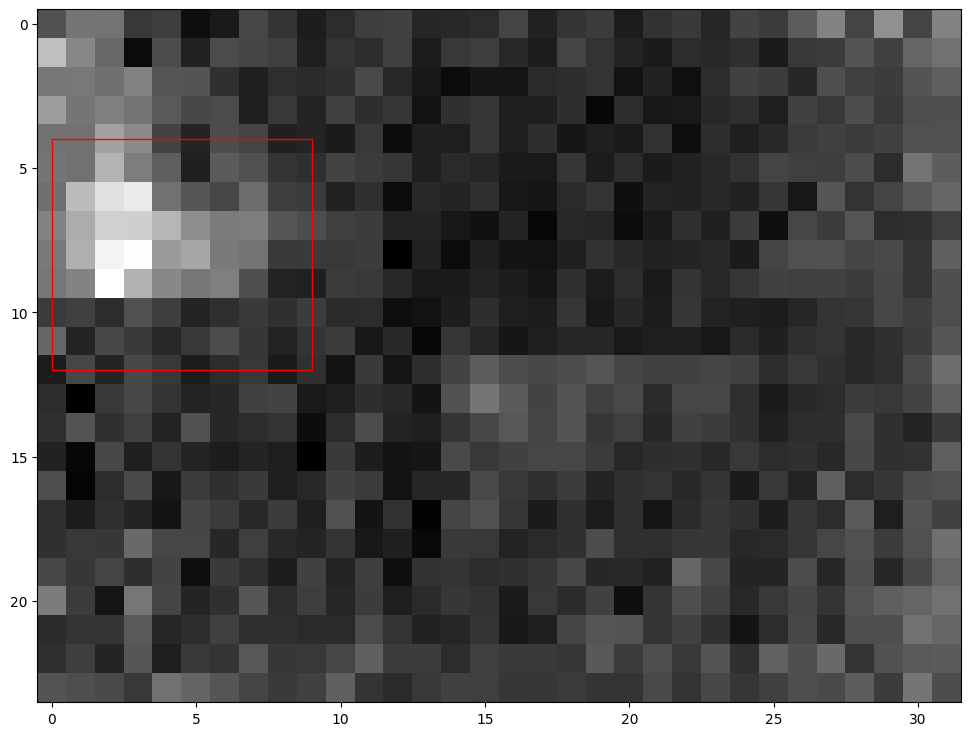

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_boxes_on_image(image, normalized_coords, width=32, height=24):

    # Remove the first dimension from normalized_coords
    normalized_coords = normalized_coords.squeeze()

    # Denormalize the coordinates
    denormalized_coords = normalized_coords * [width, height, width, height, width, height, width, height]

    if image.ndim == 4:
        image = image[0]

    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 9))
    
    # Display the image
    ax.imshow(image[:, :, 0], cmap='gray')

    # Loop over each set of coordinates and draw the bounding box
    for coord in denormalized_coords:
        # Extract coordinates for the bounding box
        top_left_x, top_left_y, top_right_x, top_right_y, bottom_right_x, bottom_right_y, bottom_left_x, bottom_left_y = coord
        
        # Create a rectangle patch using top left and bottom right coordinates
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the axis
        ax.add_patch(rect)

    plt.show()


draw_boxes_on_image(origin_images[5000:5001], norm_location[5000:5001])


In [10]:
# from keras.layers import Dense, Input, MaxPool2D, Conv2D, Conv2DTranspose, Flatten, Reshape, Activation
# from keras.layers import BatchNormalization, Dropout, Activation, concatenate
# from keras.models import Model
# from keras.layers import GRU, concatenate
# from keras.models import Model

# def DetectionModel():
#     # 이미지 입력
#     inputs_image = Input(shape=(24, 32, 1))

#     # Encoder 부분을 GRU로 구성
#     x1 = Conv2D(32, (3, 3), padding='same')(inputs_image)
#     x1 = BatchNormalization()(x1)  # BatchNorm 추가
#     x1 = Activation('relu')(x1)
    
#     x2 = Conv2D(64, (3, 3), padding='same')(x1)
#     x2 = BatchNormalization()(x2)  # BatchNorm 추가
#     x2 = Activation('relu')(x2)
    
#     x3 = Conv2D(64, (3, 3), strides=(4, 4), padding='same')(x2)
#     x3 = BatchNormalization()(x3)  # BatchNorm 추가
#     x3 = Activation('relu')(x3)
    
#     gru = Reshape((6, 8*64))(x3)
    
#     gru = GRU(64, return_sequences=True)(gru)
#     gru = GRU(64)(gru)
    
#     latent_vector = Dense(48)(gru)
#     latent_vector = BatchNormalization()(latent_vector)  # BatchNorm 추가
#     latent_vector = Activation('relu')(latent_vector)
    
#     # Decoder 부분 (이미지 재구성)
#     x = Dense(3 * 4 * 128)(latent_vector)
#     x = Reshape(target_shape=(3, 4, 128))(x)
    
#     d1 = Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same')(x)
#     d1 = BatchNormalization()(d1)  # BatchNorm 추가
#     d1 = Activation('relu')(d1)
    
#     d2 = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same')(d1)
#     d2 = BatchNormalization()(d2)  # BatchNorm 추가
#     d2 = Activation('relu')(d2)
    
#     d3 = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same')(d2)
#     d3 = BatchNormalization()(d3)  # BatchNorm 추가
#     d3 = Activation('relu')(d3)

#     d3 = concatenate([d3, x1])
    
#     reconstructed_image = Conv2DTranspose(filters=1, kernel_size=3, padding='same', activation='sigmoid')(d3)
    
#     # 추가적인 출력 계층 (좌표 예측)
#     coords_output = Dense(4*8, activation='tanh')(latent_vector)
#     coords_output = Reshape((4, 8))(coords_output)  

#     # 사람 수 예측 계층
#     number_output = Dense(5, activation='softmax', name='number_output')(latent_vector)

#     return Model(inputs_image, [reconstructed_image, number_output, coords_output])


In [11]:
# model = DetectionModel()
# model.summary()

In [12]:
import tensorflow as tf

def smooth_l1_loss(y_true, y_pred, delta=1.0):
    abs_diff = tf.abs(y_true - y_pred)
    loss = tf.where(tf.less(abs_diff, delta), 0.5 * tf.square(abs_diff), delta * (abs_diff - 0.5 * delta))
    return tf.reduce_mean(loss)

In [13]:
# from tensorflow.keras.metrics import Precision, Recall

# model.compile(
#     optimizer='adam',
#     loss=['mse', 'categorical_crossentropy', smooth_l1_loss], 
#     # loss_weights=[1, 0.1],
#     metrics =['accuracy', Precision(), Recall()]
#     )  # 재구성 손실과 좌표 손실을 조절하기 위해 loss_weights 사용

In [14]:
# hist = model.fit(
#     origin_images, [target_images, trian_labels, norm_location], 
#     epochs=50,
#     verbose = 1
# )

In [41]:
import tensorflow as tf
from tensorflow import keras 
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
from keras.layers import Dense, Input, MaxPool2D, Conv2D, Conv2DTranspose, Flatten, Reshape, Activation
from keras.layers import BatchNormalization, Dropout, Activation, concatenate
from keras.models import Model
from keras.layers import GRU, Concatenate, MaxPooling2D
from keras.models import Model
from keras.layers import Multiply
from keras.layers import MultiHeadAttention

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj):
    
    path1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    path2 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(path2)

    path3 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(path3)

    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(path4)

    return concatenate([path1, path2, path3, path4], axis=3)


def DetectionModel():
    # 이미지 입력
    inputs_image = Input(shape=(24, 32, 1))

    inception = inception_module(inputs_image,
                                filters_1x1=64,
                                filters_3x3_reduce=96,
                                filters_3x3=128,
                                filters_5x5_reduce=16,
                                filters_5x5=32,
                                filters_pool_proj=32)
    
    x1 = Conv2D(32, (3, 3), padding='same')(inception)
    x1 = BatchNormalization()(x1)  # BatchNorm 추가
    x1 = Activation('relu')(x1)
    
    x2 = Conv2D(64, (3, 3), padding='same')(x1)
    x2 = BatchNormalization()(x2)  # BatchNorm 추가
    x2 = Activation('relu')(x2)
    
    x3 = Conv2D(64, (3, 3), strides=(4, 4), padding='same')(x2)
    x3 = BatchNormalization()(x3)  # BatchNorm 추가
    x3 = Activation('relu')(x3)
    
    latent_vector = Flatten()(x3)
    latent_vector = Dense(64)(latent_vector)
    latent_vector = BatchNormalization()(latent_vector)  # BatchNorm 추가
    latent_vector = Activation('relu')(latent_vector)

    coords_features = Dense(64, activation='relu')(latent_vector)
    coords_output_intermediate = Dense(4*8, activation='sigmoid')(coords_features)
    # coords_output_intermediate = Reshape((4, 8))(coords_output_intermediate)

    # Decoder 부분 (이미지 재구성)
    x = Dense(3 * 4 * 128)(latent_vector)
    x = Reshape(target_shape=(3, 4, 128))(x)
    
    d1 = Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same')(x)
    d1 = BatchNormalization()(d1)  # BatchNorm 추가
    d1 = Activation('relu')(d1)
    
    d2 = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same')(d1)
    d2 = BatchNormalization()(d2)  # BatchNorm 추가
    d2 = Activation('relu')(d2)
    
    d3 = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same')(d2)
    d3 = BatchNormalization()(d3)  # BatchNorm 추가
    d3 = Activation('relu')(d3)

    # d3 = concatenate([d3, x1])
    
    reconstructed_image = Conv2DTranspose(filters=1, kernel_size=3, padding='same', activation='sigmoid')(d3)

    # 사람 수 예측 계층
    number_output = Dense(5, activation='softmax', name='number_output')(latent_vector)

    
    # number_output의 정보를 Dense layer를 통해 압축
    # compressed_number_output = Dense(32, activation='relu')(number_output)
    
    # Attention 정보와 number_output 정보를 통합
    merged_info = Concatenate()([latent_vector, number_output, coords_output_intermediate])
    
    # 통합된 정보를 기반으로 좌표 예측 네트워크 구성
    coords_output_final = Dense(256, activation='tanh')(merged_info)
    coords_output_final = Dropout(0.2)(coords_output_final)
    coords_output_final = Dense(128, activation='tanh')(coords_output_final)
    coords_output_final = Dropout(0.2)(coords_output_final)
    coords_output_final = Dense(4*8, activation='sigmoid')(coords_output_final)
    coords_output_final = Reshape((4, 8))(coords_output_final)

    return Model(inputs_image, [reconstructed_image, number_output, coords_output_final])


In [42]:
model = DetectionModel()
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 24, 32, 1)]          0         []                            
                                                                                                  
 conv2d_82 (Conv2D)          (None, 24, 32, 96)           192       ['input_8[0][0]']             
                                                                                                  
 conv2d_84 (Conv2D)          (None, 24, 32, 16)           32        ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_7 (MaxPoolin  (None, 24, 32, 1)            0         ['input_8[0][0]']             
 g2D)                                                                                       

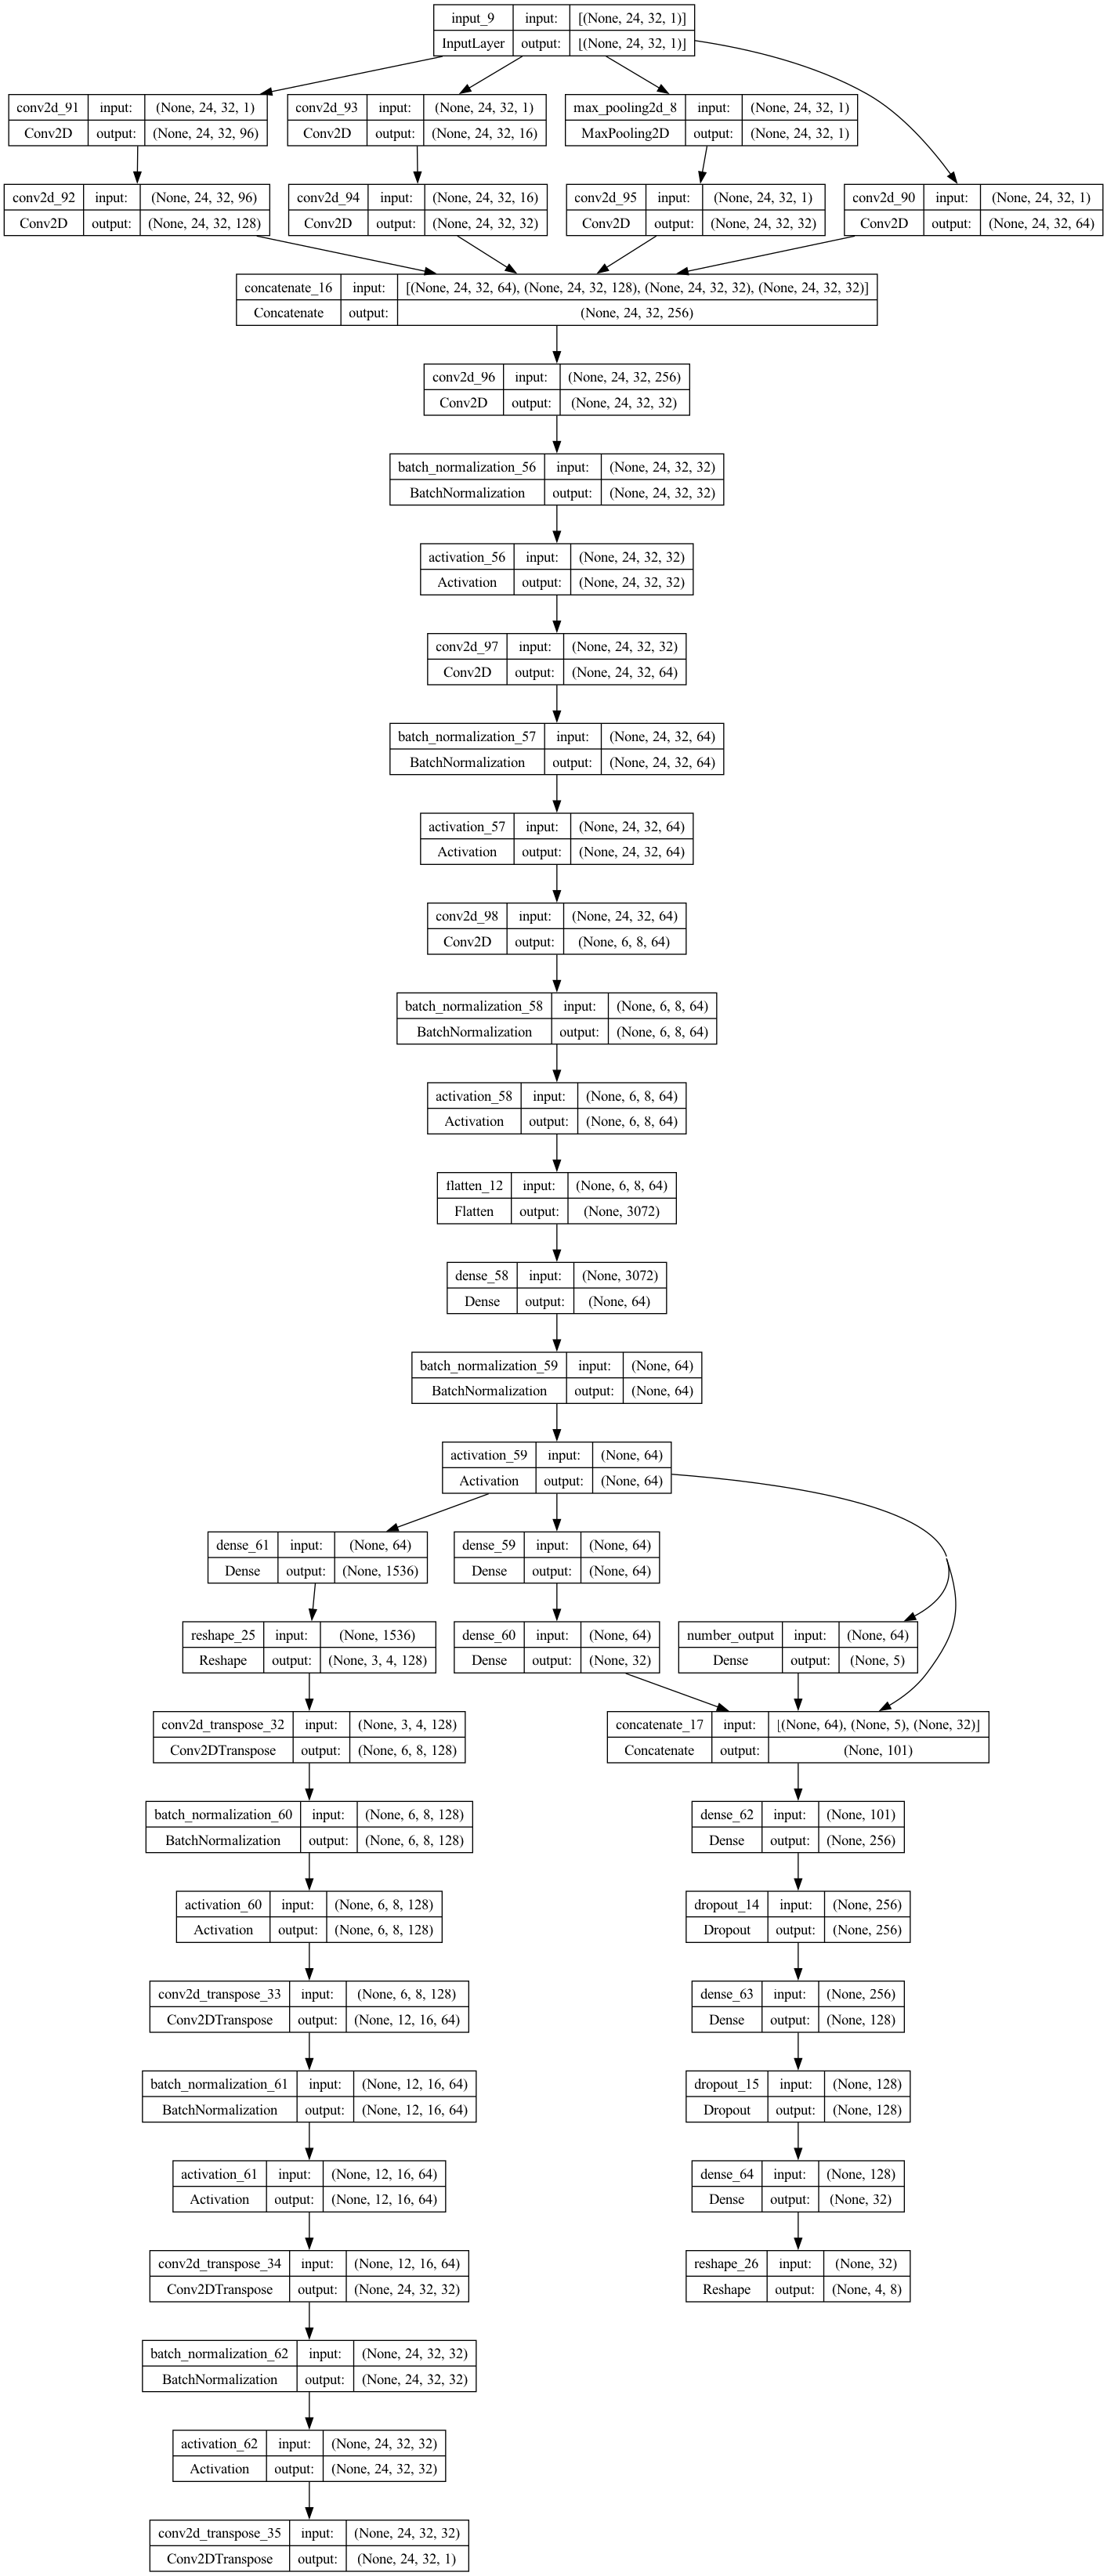

In [43]:
import os
from keras.utils import plot_model

# 모델을 생성
model = DetectionModel()

# 모델을 이미지로 그리고 저장
plot_model(model, to_file='detection_model.png', show_shapes=True, show_layer_names=True)

# 이미지를 표시
Image(filename='detection_model.png')


In [44]:
import tensorflow as tf

def smooth_l1_loss(y_true, y_pred, delta=1.0):
    abs_diff = tf.abs(y_true - y_pred)
    loss = tf.where(tf.less(abs_diff, delta), 0.5 * tf.square(abs_diff), delta * (abs_diff - 0.5 * delta))
    return tf.reduce_mean(loss)

In [45]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.metrics import Precision, Recall

class CustomTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        
        # 메트릭 이름이 실제 로그에 기록된 이름과 일치하는지 확인
        reconstructed_image_accuracy = logs.get('conv2d_transpose_3', 0)
        number_output_accuracy = logs.get('number_output_accuracy', 0)
        coords_output_accuracy = logs.get('reshape_2_accuracy', 0)
        
        # number_output과 reconstructed_image의 정확도가 80% 이상일 때까지만 훈련
        if number_output_accuracy >= 0.8 and reconstructed_image_accuracy >= 0.8:
            # coords_output만 훈련
            for layer in self.model.layers:
                if 'reshape_20' in layer.name:  # 'reshape_20'는 coords_output의 레이어 이름으로 추정
                    layer.trainable = True
                else:
                    layer.trainable = False
            # 모델 컴파일 부분을 업데이트 해야 할 수도 있음. (여기서는 생략)

        # coords_output의 정확도가 60% 이상이면 모든 레이어를 다시 훈련
        if coords_output_accuracy >= 0.6:
            for layer in self.model.layers:
                layer.trainable = True
            # 모델 컴파일 부분을 업데이트 해야 할 수도 있음. (여기서는 생략)


model.compile(
    optimizer='adam',
    loss=['mse', 'categorical_crossentropy', smooth_l1_loss], 
    # loss_weights=[1, 0.1],
    metrics=['accuracy', Precision(), Recall()]
    )  # 재구성 손실과 좌표 손실을 조절하기 위해 loss_weights 사용


hist = model.fit(
    origin_images, [target_images, number_labels, norm_location], 
    epochs=50,
    verbose=1,
    callbacks=[CustomTrainingCallback()]  # 사용자 정의 콜백 추가
)

Epoch 1/50


2023-11-05 22:09:28.514984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


415/415 [==============================] - 28s 61ms/step - loss: 0.5909 - conv2d_transpose_35_loss: 0.0157 - number_output_loss: 0.5536 - reshape_26_loss: 0.0216 - conv2d_transpose_35_accuracy: 0.7909 - conv2d_transpose_35_precision_1: 0.9277 - conv2d_transpose_35_recall_1: 0.1877 - number_output_accuracy: 0.7769 - number_output_precision_1: 0.8225 - number_output_recall_1: 0.7218 - reshape_26_accuracy: 0.2297 - reshape_26_precision_1: 0.9464 - reshape_26_recall_1: 0.4504
Epoch 2/50
415/415 [==============================] - 23s 55ms/step - loss: 0.3327 - conv2d_transpose_35_loss: 0.0090 - number_output_loss: 0.3098 - reshape_26_loss: 0.0139 - conv2d_transpose_35_accuracy: 0.7933 - conv2d_transpose_35_precision_1: 0.9844 - conv2d_transpose_35_recall_1: 0.2448 - number_output_accuracy: 0.8885 - number_output_precision_1: 0.8985 - number_output_recall_1: 0.8727 - reshape_26_accuracy: 0.2505 - reshape_26_precision_1: 0.9754 - reshape_26_recall_1: 0.5060
Epoch 3/50
415/415 [===============

In [20]:
# from tensorflow.keras.layers import Input, Conv2D, Reshape, Concatenate
# from tensorflow.keras.models import Model

# def create_ssd_model(input_shape):
#     inputs = Input(shape=input_shape)

#     # Base network
#     x = Conv2D(16, (3, 3), padding='same', activation='relu')(inputs)
#     x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
#     base_net = x

#     # Additional feature layers
#     x1 = Conv2D(32, (3, 3), padding='same', activation='relu')(base_net)
#     x1 = Conv2D(32, (3, 3), padding='same', activation='relu')(x1)

#     x2 = Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
#     x2 = Conv2D(64, (3, 3), padding='same', activation='relu')(x2)

#     # Prediction from base network
#     pred_1 = Conv2D(4, (1, 1), padding='same', activation='sigmoid')(base_net)
#     pred_1 = Reshape((-1, 4))(pred_1)

#     # Prediction from 1st additional layer
#     pred_2 = Conv2D(4, (1, 1), padding='same', activation='sigmoid')(x1)
#     pred_2 = Reshape((-1, 4))(pred_2)

#     # Prediction from 2nd additional layer
#     pred_3 = Conv2D(4, (1, 1), padding='same', activation='sigmoid')(x2)
#     pred_3 = Reshape((-1, 4))(pred_3)

#     # Concatenate predictions
#     # Concatenate predictions
#     predictions = Concatenate(axis=1)([pred_1, pred_2, pred_3])
    
#     # Flatten the predictions before the Dense layers
#     coords_output_final = Flatten()(predictions)
    
#     # Dense layers to match the desired output shape (4, 8)
#     coords_output_final = Dense(256, activation='relu')(coords_output_final)
#     coords_output_final = Dropout(0.2)(coords_output_final)
#     coords_output_final = Dense(128, activation='relu')(coords_output_final)
#     coords_output_final = Dropout(0.2)(coords_output_final)
#     coords_output_final = Dense(4*8, activation='sigmoid')(coords_output_final)
#     coords_output_final = Reshape((4, 8))(coords_output_final)
    
#     # Create the final model
#     model = Model(inputs=inputs, outputs=coords_output_final)


#     return model

# # Define the input shape
# input_shape = (24, 32, 1)  # Input shape of the image

# # Create the SSD model
# model = create_ssd_model(input_shape)

# # Compile the model
# # model.compile(optimizer='adam', loss='mean_squared_error')

# # Model summary to check the number of parameters
# model.summary()


In [21]:
# import tensorflow as tf

# def iou(y_true, y_pred):
#     # y_true and y_pred shape should be (batch, boxes, 4) where last dimension is (x_center, y_center, width, height)
#     # Convert YOLO format (center x, center y, width, height) to corner format (x_min, y_min, x_max, y_max)
#     true_boxes = convert_to_corners(y_true)
#     pred_boxes = convert_to_corners(y_pred)
    
#     # Calculate intersection area
#     xA = tf.maximum(true_boxes[..., 0], pred_boxes[..., 0])
#     yA = tf.maximum(true_boxes[..., 1], pred_boxes[..., 1])
#     xB = tf.minimum(true_boxes[..., 2], pred_boxes[..., 2])
#     yB = tf.minimum(true_boxes[..., 3], pred_boxes[..., 3])
    
#     interArea = tf.maximum(0.0, xB - xA) * tf.maximum(0.0, yB - yA)
    
#     # Calculate union area
#     boxAArea = (true_boxes[..., 2] - true_boxes[..., 0]) * (true_boxes[..., 3] - true_boxes[..., 1])
#     boxBArea = (pred_boxes[..., 2] - pred_boxes[..., 0]) * (pred_boxes[..., 3] - pred_boxes[..., 1])
#     unionArea = boxAArea + boxBArea - interArea
    
#     # Calculate IoU
#     iou = interArea / unionArea
    
#     # Handle case where unionArea is 0, which makes IoU undefined
#     iou = tf.where(tf.equal(unionArea, 0), tf.zeros_like(unionArea), iou)
    
#     return tf.reduce_mean(iou, axis=-1)  # Reduce mean to aggregate IoU for all boxes

# # Convert boxes to corner format from YOLO format for usage with iou calculation
# def convert_to_corners(boxes):
#     x_center, y_center, width, height = tf.unstack(boxes, axis=-1)
#     x_min = x_center - (width / 2)
#     y_min = y_center - (height / 2)
#     x_max = x_center + (width / 2)
#     y_max = y_center + (height / 2)
    
#     return tf.stack([x_min, y_min, x_max, y_max], axis=-1)

# # You can compile your model using the iou function as a metric
# # model.compile(optimizer='adam', loss=smooth_l1_loss, metrics=[iou])


In [22]:
# print(norm_location.shape)
# print(norm_location[999])

In [23]:
# def convert_to_yolo_format(boxes):
#     # boxes shape: (batch_size, 4, 8)
#     # 8 coordinates for each box are organized as:
#     # [x_min, y_min, x_max, y_min, x_max, y_max, x_min, y_max]
    
#     # Assuming boxes are already normalized (coordinates are between 0 and 1)
#     boxes = tf.reshape(boxes, (-1, 4, 4, 2))  # reshape to (batch_size, 4, 4, 2) to separate x and y
#     min_coords = tf.reduce_min(boxes, axis=2)  # min x and min y (batch_size, 4, 2)
#     max_coords = tf.reduce_max(boxes, axis=2)  # max x and max y (batch_size, 4, 2)
    
#     centers = (min_coords + max_coords) / 2.0  # center x and center y (batch_size, 4, 2)
#     sizes = max_coords - min_coords  # width and height (batch_size, 4, 2)

#     return tf.concat([centers, sizes], axis=-1) 

In [24]:
# norm_location = convert_to_yolo_format(norm_location)

In [25]:
# print(norm_location.shape)
# print(norm_location[800])

In [26]:
# from tensorflow.keras import backend as K


# def iou_accuracy(y_true, y_pred, iou_threshold=0.5):
#     iou_scores = iou(y_true, y_pred)  # Your existing IoU function
#     # Define a binary accuracy based on IoU threshold
#     accurate_predictions = K.cast(iou_scores > iou_threshold, K.floatx())
#     return K.mean(accurate_predictions)

In [27]:
# from tensorflow.keras.metrics import Precision, Recall
# import tensorflow_addons as tfa
# # model = Model(inputs=[Input(shape=(None, None, 3))], outputs=[Input(shape=(4, 8))])
# # model.compile(optimizer='adam', loss=smooth_l1_loss, metrics=[iou])

# # mAP = tfa.metrics.MultiLabelConfusionMatrix(num_classes=(32))

# model.compile(optimizer='adam', loss=smooth_l1_loss, metrics=['accuracy'])

# hist = model.fit(
#     origin_images, norm_location, 
#     epochs=50,
#     verbose=1
# )

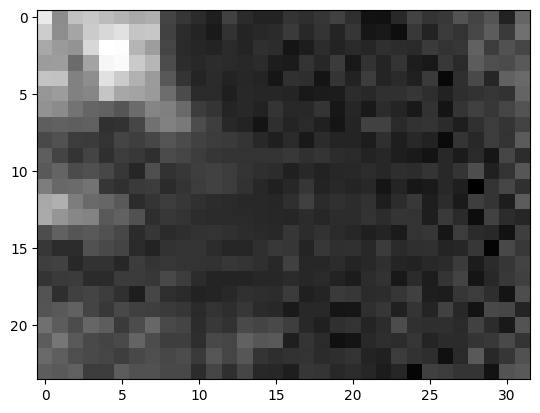

1/1 [==============================] - 0s 28ms/step
3


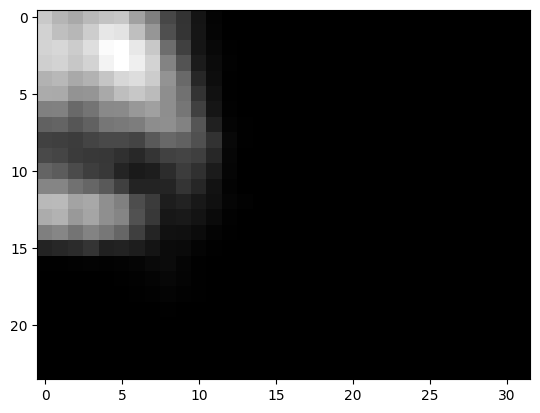

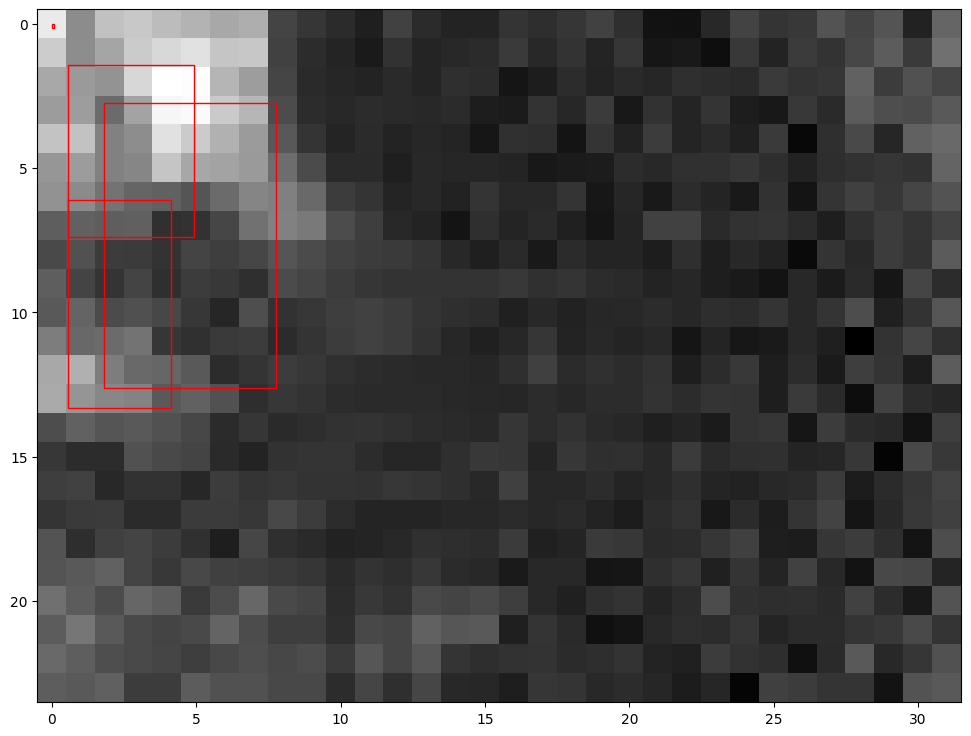

In [47]:

plt.imshow(origin_images[6000], cmap='gray')
plt.show()
res = model.predict(origin_images[6000:6001])
# print(origin_images[2000:2001].shape)
# images = np.concatenate([origin_images[110:115],  target_images[110:115], res[0][:6]], axis = 1).transpose(1, 0, 2, 3).reshape(72, -1, 1)

# plt.imshow(images, cmap='gray')
# plt.show()

# print(res[1][:6])
# print(res[1][:6])
# [reconstructed_image, number_output, coords_output])
plt.imshow(res[0][0], cmap='gray')
print(res[1].argmax())
draw_boxes_on_image(origin_images[6000:6001], res[2][:])


In [29]:
model.save('./detection_v2.h5')

In [53]:
import os
import re
import cv2
import numpy as np

def extract_number(filename):
    match = re.search(r'(\d+)_png', filename)
    if match:
        return int(match.group(1))
    return None

def make_video_from_images(image_folder, video_name, fps=10.0):
    # 이미지 폴더 내의 모든 파일들을 가져옵니다.
    images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # 숫자 기준으로 이미지들을 정렬합니다.
    images.sort(key=extract_number)

    # 첫 번째 이미지를 통해 프레임의 너비와 높이를 가져옵니다.
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    h, w, layers = frame.shape
    size = (w, h)

    # VideoWriter 객체를 초기화합니다.
    out = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

    # 이미지들을 하나씩 동영상에 추가합니다.
    for image in images:
        img_path = os.path.join(image_folder, image)
        img = cv2.imread(img_path)
        out.write(img)

    # 작업 완료 후, VideoWriter 객체를 해제합니다.
    out.release()

def save_draw_boxes_on_image(image, normalized_coords, save_path, num_people=None, width=32, height=24):
    normalized_coords = normalized_coords.squeeze()
    # Denormalize the coordinates
    denormalized_coords = normalized_coords * [width, height, width, height, width, height, width, height]
    if image.ndim == 4:
        image = image[0]
    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 9))
    # Display the image
    ax.imshow(image[:, :, 0], cmap='gray')
    if num_people is not None:
        ax.text(0.5, 0.1, f"Number of people: {num_people}", 
                transform=ax.transAxes, 
                color='white', 
                ha="center", 
                va="center", 
                fontsize=12, 
                bbox=dict(boxstyle="round", fc="red"))
    # Loop over each set of coordinates and draw the bounding box
    # for coord in denormalized_coords:
    #     # Extract coordinates for the bounding box
    #     top_left_x, top_left_y, top_right_x, top_right_y, bottom_right_x, bottom_right_y, bottom_left_x, bottom_left_y = coord
    #     # Create a rectangle patch using top left and bottom right coordinates
    #     rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y, linewidth=1, edgecolor='r', facecolor='none')
    #     # Add the patch to the axis
    #     ax.add_patch(rect)
    plt.savefig(save_path)
    plt.close()  # 이 라인을 추가하여 화면에 표시되는 창을 닫습니다.
    return save_path

def generate_video_from_images():
    # 예측할 이미지 경로(예측 후 동영상으로 변환될 이미지)
    image_dir = '/Users/mac/Dev/Project/ThermalCamera/Model/Custom/Datasets/original/Video/2023-11-04 03-32-09/'
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')], key=extract_number)
    print(image_files)
    frame_height, frame_width = 24, 32
    
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        img = img.reshape(24, 32, 1)
        img_batch = np.expand_dims(img, axis=0)
        res = model.predict(img_batch / img_batch.max())
        # 예측 한 이미지를 저장할 폴더
        output_folder = "/Users/mac/Dev/Project/ThermalCamera/Model/Custom/Datasets/Video/img2/"
        save_path = os.path.join(output_folder, image_file)

        saved_image_path = save_draw_boxes_on_image(img, res[2][:], save_path, res[1].argmax())
        saved_image_gray = cv2.imread(saved_image_path, cv2.IMREAD_GRAYSCALE)
        
        saved_image = cv2.cvtColor(saved_image_gray, cv2.COLOR_GRAY2BGR)

    # 이 부분에서 이미지들을 동영상으로 만드는 함수를 호출합니다.
    # 예측 한 이미지를 저장할 폴더와 같은 폴더
    image_folder = '/Users/mac/Dev/Project/ThermalCamera/Model/Custom/Datasets/Video/img2/'  # 이미지 폴더 경로
    video_name = '/Users/mac/Dev/Project/ThermalCamera/Model/Custom/Datasets/Video/video3.avi'  # 저장될 동영상 파일 이름
    make_video_from_images(image_folder, video_name)
    print("Video generated successfully.")

if __name__ == "__main__":
    generate_video_from_images()


['0_png.png', '1_png.png', '2_png.png', '3_png.png', '4_png.png', '5_png.png', '6_png.png', '7_png.png', '8_png.png', '9_png.png', '10_png.png', '11_png.png', '12_png.png', '13_png.png', '14_png.png', '15_png.png', '16_png.png', '17_png.png', '18_png.png', '19_png.png', '20_png.png', '21_png.png', '22_png.png', '23_png.png', '24_png.png', '25_png.png', '26_png.png', '27_png.png', '28_png.png', '29_png.png', '30_png.png', '31_png.png', '32_png.png', '33_png.png', '34_png.png', '35_png.png', '36_png.png', '37_png.png', '38_png.png', '39_png.png', '40_png.png', '41_png.png', '42_png.png', '43_png.png', '44_png.png', '45_png.png', '46_png.png', '47_png.png', '48_png.png', '49_png.png', '50_png.png', '51_png.png', '52_png.png', '53_png.png', '54_png.png', '55_png.png', '56_png.png', '57_png.png', '58_png.png', '59_png.png', '60_png.png', '61_png.png', '62_png.png', '63_png.png', '64_png.png', '65_png.png', '66_png.png', '67_png.png', '68_png.png', '69_png.png', '70_png.png', '71_png.png', '

2023-11-05 22:46:14.283700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step
Video generated successfully.


In [31]:


import visualkeras
model = keras.models.load_model('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/detection_v2.h5',  custom_objects={'smooth_l1_loss': smooth_l1_loss})
model = model

visualkeras.layered_view(model, scale_xy=1, scale_z=1, max_z=1000).show() # display using your system viewer
# visualkeras.layered_view(model, to_file='output.png') # write to disk
# visualkeras.layered_view(model, to_file='output.png').show() # write and show

TypeError: 'int' object is not iterable